In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error as mse,mean_absolute_error as mae

In [2]:
df=pd.read_excel("Data_Train.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
df.dropna(inplace = True)

In [6]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [7]:
df["Date_of_Journey"].value_counts()

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64

In [8]:
df["Journey_day"]=pd.to_datetime(df["Date_of_Journey"],format= "%d/%m/%Y").dt.day
df["Journey_month"]=pd.to_datetime(df["Date_of_Journey"],format= "%d/%m/%Y").dt.month


In [9]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [10]:
df.drop("Date_of_Journey",axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [11]:
df["Dep_hour"]=pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"]=pd.to_datetime(df["Dep_Time"]).dt.minute
df.drop("Dep_Time",axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [12]:
df["Arrival_hour"]=pd.to_datetime(df["Arrival_Time"]).dt.hour
df["Arrival_min"]=pd.to_datetime(df["Arrival_Time"]).dt.minute
df.drop("Arrival_Time",axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [13]:
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split())!= 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"  
        else:
            duration[i] = "0h " + duration[i]          

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))   
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [14]:
df["Duration_hours"]=duration_hours
df["Duration_mins"]=duration_mins

In [15]:
df.drop("Duration",axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [16]:
df.drop(["Route","Additional_Info"],axis=1,inplace=True)

In [17]:
df.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [18]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [19]:
le=LabelEncoder()
df.Airline=le.fit_transform(df.Airline)

In [20]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,3,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,1,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,4,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,3,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,3,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [21]:
df["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [22]:
le=LabelEncoder()
df["Source"]=le.fit_transform(df["Source"])

In [23]:
df["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [24]:
le=LabelEncoder()
df["Destination"]=le.fit_transform(df["Destination"])

In [25]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,3,0,5,0,3897,24,3,22,20,1,10,2,50
1,1,3,0,2,7662,1,5,5,50,13,15,7,25
2,4,2,1,2,13882,9,6,9,25,4,25,19,0
3,3,3,0,1,6218,12,5,18,5,23,30,5,25
4,3,0,5,1,13302,1,3,16,50,21,35,4,45


In [26]:
df.shape

(10682, 13)

### Test data

In [27]:
df1=pd.read_excel("Test_set.xlsx")
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [29]:
df1.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [30]:
df1["Journey_day"]=pd.to_datetime(df1["Date_of_Journey"],format="%d/%m/%Y").dt.day
df1["Journey_month"]=pd.to_datetime(df1["Date_of_Journey"],format="%d/%m/%Y").dt.month
df1.drop("Date_of_Journey",axis=1,inplace=True)

In [31]:
df1["Dep_hour"]= pd.to_datetime(df1["Dep_Time"]).dt.hour
df1["Dep_min"]=pd.to_datetime(df1["Dep_Time"]).dt.minute
df1.drop("Dep_Time",axis=1,inplace=True)

In [32]:
df1["Arrival_hour"]=pd.to_datetime(df1["Arrival_Time"]).dt.hour
df1["Arrival_min"]=pd.to_datetime(df1["Arrival_Time"]).dt.minute
df1.drop("Arrival_Time",axis=1,inplace=True)

In [33]:
duration = list(df1["Duration"])

for i in range(len(duration)):
    if len(duration[i].split())!= 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"  
        else:
            duration[i] = "0h " + duration[i]          

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))   
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [34]:
df1["Duration_hours"]=duration_hours
df1["Duration_mins"]=duration_mins
df1.drop("Duration",axis=1,inplace=True)

In [35]:
df1.drop(["Route","Additional_Info"],axis=1,inplace=True)

In [36]:
df1.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [37]:
le=LabelEncoder()
df1.Airline=le.fit_transform(df1.Airline)

In [38]:
le=LabelEncoder()
df1["Source"]=le.fit_transform(df1["Source"])

In [39]:
le=LabelEncoder()
df1["Destination"]=le.fit_transform(df1["Destination"])

In [40]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Duration_hours', 'Duration_mins'],
      dtype='object')

In [41]:
x=df.loc[:,['Airline', 'Source', 'Destination', 'Total_Stops',
       'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Duration_hours', 'Duration_mins']]
x.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,3,0,5,0,24,3,22,20,1,10,2,50
1,1,3,0,2,1,5,5,50,13,15,7,25
2,4,2,1,2,9,6,9,25,4,25,19,0
3,3,3,0,1,12,5,18,5,23,30,5,25
4,3,0,5,1,1,3,16,50,21,35,4,45


In [42]:
y=df.iloc[:,4]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

<AxesSubplot:>

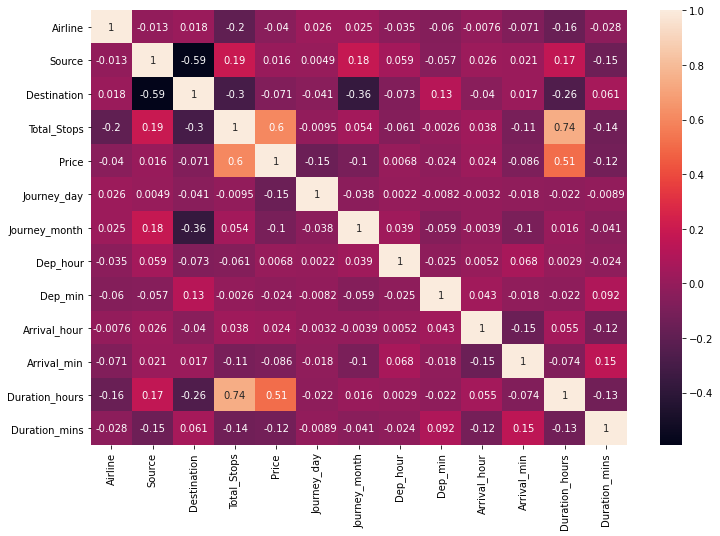

In [43]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [44]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

In [45]:
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)
print(f"R2 score -- {r2_score(ytest,ypred)}")
print(f"MSE -- {mse(ytest,ypred)}")
print(f"MAE -- {mae(ytest,ypred)}")
print(f"RMSE -- {np.sqrt(mse(ytest,ypred))}")

R2 score -- 0.8024660644805731
MSE -- 4007972.0825572843
MAE -- 1210.0459217996115
RMSE -- 2001.9920285948403


In [46]:
rf.score(xtrain,ytrain)

0.9539459561866709

In [47]:
para={"n_estimators":[100,150,200,250],"max_features":["auto","sqrt"],"max_depth":[5,10,15,20,25,30]}

In [49]:
rs=RandomizedSearchCV(RandomForestRegressor(),para,refit=True,verbose=3)
rs.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=20, max_features=sqrt, n_estimators=150; total time=   3.1s
[CV 2/5] END max_depth=20, max_features=sqrt, n_estimators=150; total time=   3.1s
[CV 3/5] END max_depth=20, max_features=sqrt, n_estimators=150; total time=   3.0s
[CV 4/5] END max_depth=20, max_features=sqrt, n_estimators=150; total time=   2.9s
[CV 5/5] END max_depth=20, max_features=sqrt, n_estimators=150; total time=   3.0s
[CV 1/5] END max_depth=25, max_features=sqrt, n_estimators=200; total time=   4.1s
[CV 2/5] END max_depth=25, max_features=sqrt, n_estimators=200; total time=   4.2s
[CV 3/5] END max_depth=25, max_features=sqrt, n_estimators=200; total time=   4.3s
[CV 4/5] END max_depth=25, max_features=sqrt, n_estimators=200; total time=   4.2s
[CV 5/5] END max_depth=25, max_features=sqrt, n_estimators=200; total time=   4.1s
[CV 1/5] END max_depth=20, max_features=sqrt, n_estimators=100; total time=   2.1s
[CV 2/5] END max_depth=20,

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [100, 150, 200, 250]},
                   verbose=3)

In [52]:
rs.best_params_

{'n_estimators': 250, 'max_features': 'sqrt', 'max_depth': 15}

In [53]:
rf1=RandomForestRegressor(n_estimators=250,max_features='sqrt',max_depth=15)
rf1.fit(xtrain,ytrain)
ypred=rf1.predict(xtest)
print(f"R2 score -- {r2_score(ytest,ypred)}")
print(f"MSE -- {mse(ytest,ypred)}")
print(f"MAE -- {mae(ytest,ypred)}")
print(f"RMSE -- {np.sqrt(mse(ytest,ypred))}")

R2 score -- 0.817841725888268
MSE -- 3695999.2485687975
MAE -- 1251.395934820113
RMSE -- 1922.4981790807494
